## imports ##

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Reading Dataset ###


In [4]:
db_read = pd.read_csv('iris.csv')
db_read.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Describe ###

In [5]:
db_read.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### checking for null values ###

In [6]:
db_read.isnull().values.any()

False

### counting class values ###

In [7]:
print(db_read['variety'].value_counts())
print(db_read.groupby('variety').size())

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64
variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


### box-plotting 

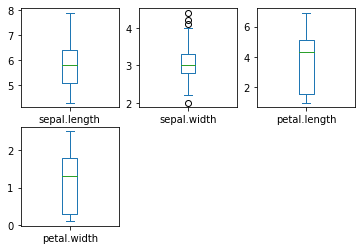

In [8]:
db_read.plot(kind='box', subplots = True, layout=(2,3), sharex = False, sharey = False)
plt.show()

### dataset histogram

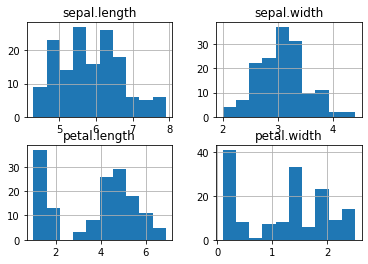

In [9]:
db_read.hist()
plt.show()

### Heatmap

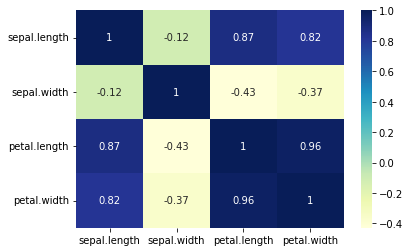

In [10]:
import seaborn as sb

heatmap_data = sb.heatmap(db_read.corr(), cmap="YlGnBu", annot=True)

plt.show()

### getting x, y variables

In [11]:
x = db_read.iloc[:, 0:-1]
y = db_read.iloc[:, -1]

y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [12]:
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### test-train split

In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.25, random_state = 42, stratify=y)

### Building Models for iris flower classification

In [14]:
models = []

models.append( ('LR',  LogisticRegression()) )
models.append( ('CART',DecisionTreeClassifier()) )
models.append( ('KNN', KNeighborsClassifier()) )
models.append( ('NB',  GaussianNB()) )
models.append( ('LDA',  LinearDiscriminantAnalysis()) )
models.append( ('SVM',  SVC()) )


In [15]:
def classification_models(xtrain, xtest, ytrain, ytest):

    modeloutcomes = []
    modelnames = []

    for name,model in models:
        results = model_selection.cross_val_score(model, xtrain, ytrain, cv = 6, scoring = 'accuracy')

        print(name, results.mean())
        modeloutcomes.append(results)
        modelnames.append(name)
    
    print(modeloutcomes)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)

LR 0.9639376218323585
CART 0.9288499025341131
KNN 0.9551656920077972
NB 0.9551656920077972
LDA 0.973196881091618
SVM 0.9551656920077972
[array([0.94736842, 1.        , 0.94736842, 1.        , 1.        ,
       0.88888889]), array([0.84210526, 0.94736842, 0.89473684, 1.        , 1.        ,
       0.88888889]), array([0.94736842, 1.        , 0.89473684, 1.        , 1.        ,
       0.88888889]), array([1.        , 0.89473684, 0.94736842, 1.        , 1.        ,
       0.88888889]), array([1.        , 0.94736842, 0.94736842, 1.        , 1.        ,
       0.94444444]), array([0.89473684, 1.        , 0.94736842, 1.        , 1.        ,
       0.88888889])]


C:\Users\MTCS-50\AppData\Local\Temp\ipykernel_13224\3716146443.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelnames)


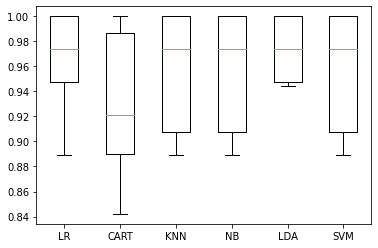

In [16]:
classification_models(x_train, x_test, y_train, y_test)

### Evaluating and predicting models

In [17]:
for name,model in models:
    train_model = model.fit(x_train, y_train)

    y_predict = train_model.predict(x_test)

    accuracy = accuracy_score(y_test, y_predict)
    class_report = classification_report(y_test, y_predict)
    confusion = confusion_matrix(y_test, y_predict)

    print('\n\n************* '+ name +' ***************')
    print('The accuracy: {}'.format(accuracy))
    print('The Classification Report:\n {}'.format(class_report))
    print(f'\n Confusion Matrix: \n {confusion}')

    # ax = sb.heatmap(confusion, annot=True, cmap='Blues')

    # ax.set_title('Confusion Matrix with labels\n\n');
    # ax.set_xlabel('\nPredicted Values')
    # ax.set_ylabel('Actual Values ');

    # plt.show()



************* LR ***************
The accuracy: 0.9473684210526315
The Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       0.92      0.92      0.92        13
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


 Confusion Matrix: 
 [[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]


************* CART ***************
The accuracy: 0.9210526315789473
The Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       0.86      0.92      0.89        13
   Virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0